In [1]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import cufflinks as cf
from pylab import plt
np.random.seed(1000)
plt.style.use('seaborn')
%matplotlib inline

In [2]:
raw = pd.read_csv('Tourism.Bank.csv',index_col=1, parse_dates=True)
#raw = pd.read_csv('S I..N..C..Ind..csv',index_col=1, parse_dates=True)
#raw = pd.read_csv('Social.Sec.Inv.csv',index_col=1, parse_dates=True)
#raw = pd.read_csv('S Pasargad.Insur..csv',index_col=1, parse_dates=True)
#raw = pd.read_csv('Jahrom.Power.Plant.csv',index_col=1, parse_dates=True)
symbol = '<CLOSE>'
data = pd.DataFrame(raw[symbol])
data['returns'] = np.log(data / data.shift(1))
data.dropna(inplace=True)
data.head()

,<CLOSE>,returns
<DTYYYYMMDD>,,
2021-08-03,13887.0,0.004258
2021-08-02,13972.0,0.006102
2021-08-01,14157.0,0.013154
2021-07-31,14309.0,0.010680
2021-07-28,14359.0,0.003488


In [3]:
mu = data.returns.mean() * 252 #Calculates the annualized return
mu
sigma = data.returns.std() * 252 ** 0.5 #Calculates the annualized volatility
sigma
r = 0.0 #Sets the risk-free rate to 0 (for simplicity)
f = (mu - r) / sigma ** 2 #Calculates the optimal Kelly fraction to be invested in the strategy
f

-2.5303767316545875

In [5]:
equs = []
def kelly_strategy(f):
    global equs
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)
    data[equ] = 1
    data[cap] = data[equ] * f
    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i]
        data.loc[t, cap] = data[cap].loc[t_1] *  math.exp(data['returns'].loc[t])
        data.loc[t, equ] = data[cap].loc[t] -  data[cap].loc[t_1] +  data[equ].loc[t_1]
        data.loc[t, cap] = data[equ].loc[t] * f
        
kelly_strategy(f * 0.5)
kelly_strategy(f * 0.66)
kelly_strategy(f)
print(data[equs].tail())

              equity_-1.27  equity_-1.67  equity_-2.53
<DTYYYYMMDD>                                          
2019-05-07       -1.183476    -26.483379   -471.754851
2019-05-06       -1.024588    -21.790063   -345.083390
2019-05-05       -0.921305    -18.890660   -275.512076
2019-05-04       -0.895851    -18.201729   -260.288182
2019-05-01       -0.900863    -18.336133   -263.200314


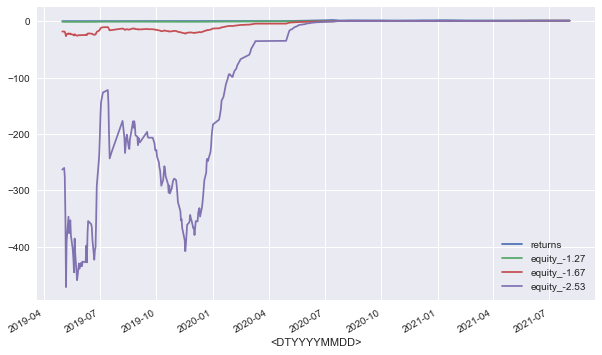

In [ ]:
ax = data['returns'].cumsum().apply(np.exp).plot(legend=True,figsize=(10, 6))
data[equs].plot(ax=ax, legend=True);